**Assignment 8**

Author: Ana Tupa

Date: April 03, 2025

This script analyzes the Wine Quality dataset, performs exploratory data analysis (EDA), and answers key questions about the dataset, missing data handling, and feature engineering. We also explore and students dataset to answer some questions


---

**Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in predicting the quality of wine.**

In [70]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from scipy.stats import shapiro, boxcox
from sklearn.preprocessing import LabelEncoder
from scipy import stats

In [50]:
# Load the dataset
wine_df = pd.read_csv("winequality-red.csv")

In [51]:
# View the first 5 rows
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Feature Description:**


*   Fixed acidity: Affects the taste of wine but not strongly correlated with quality. Unit of measure: (g(tartaricacid) dm3)
*   Volatile acidity: Higher values lead to an unpleasant vinegar taste, negatively impacting quality. Unit of measure: (g(aceticacid) dm3)
*   Citric acid: Adds freshness and stability, generally contributing to higher quality. Unit of measre: (g dm3)
*   Residual sugar: Influences sweetness; important for certain types of wine. Unit of measure: (g dm3)
*   Chlorides: Indicator of salt content; excessive amounts negatively impact taste. Unit of measure: (g(sodiumchloride) dm3)
*   Free sulfur dioxide: Prevents microbial growth; excessive amounts affect flavor. Unit of measure: (mg dm3)
*   Total sulfur dioxide: Preserves wine but can impact quality if too high. Unit of measure: (mg dm3)
*   Density: Correlates with sugar and alcohol content. Unit of measure: (g cm3)
*   pH: Measures acidity; balance is key for good taste.
*   Sulphates: Enhances wine preservation and can impact aroma. Unit of measure: (g(potassiumsulphate) dm3)
*   Alcohol: Higher alcohol content is often linked to higher quality. Unit of masure: (%vol.)

Source: chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://projects.csail.mit.edu/wiki/pub/Evodesign/SensoryEvaluationsDatabase/winequality09.pdf?utm_source=chatgpt.com

In [52]:
# Display basic info
print("Dataset Information:")
wine_df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


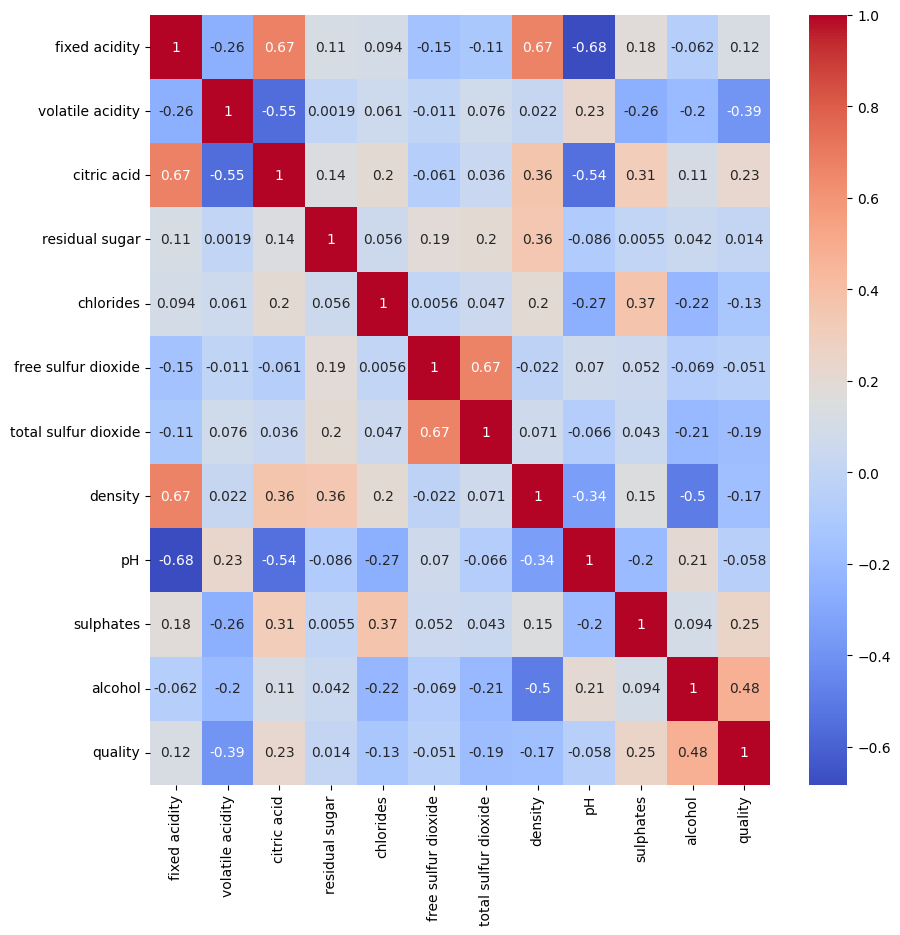

In [53]:
# Correlation Matrix
plt.figure(figsize=(10,10))
# Select only numerical features for correlation calculation
sns.heatmap(wine_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [54]:
# Discussing the importance of features in predicting wine quality
feature_correlation = wine_df.corr()["quality"].sort_values(ascending=False)
print("\nFeature Importance (Correlation with Quality):\n", feature_correlation)


Feature Importance (Correlation with Quality):
 quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


**Importance of Every Feature:**

*Positive Correlations:* Properties such as alcohol (0.476), sulphates (0.251), citric acid (0.226) and fixed acidity (0.124) improve the quality of wine.

*Negative Correlations:* Chlorides (-0.129), density (-0.175), amounts of sulfur dioxide (-0.185) and volatile acidity (-0.391) negatively impact the quality of wine.

*Minimal or no correlation*: Properties such as residual sugar (0.014) and sulfur dioxide (-0.051) and pH (-0.058) have a minimal o no correlation influence on quality.

In conclusion, alcohol is the most important predictor of wine quality, sulphates and citric acid moderately contribute to quality and volatile acidity significantly reduces quality, meaning wines with high levels of it are generally rated lower.

Other features have weak correlations, implying they are less significant in determining wine quality.


---



**Q2: How did you handle missing data in the wine quality data set during the feature engineering process? Discuss the advantages and disadvantages of different imputation techniques.**

In [55]:
# Missing values
print(wine_df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In this case we don' have missing data. However we can handeling missing data using the next techniques:

1. Remove rows with missing values. One of the advantages is that we don't need to do any assumption. However, we can lose valuable data and reduce the sample size.

2. Remove columns with too many missing values.This allow you to keeps dataset integrity if many missing values exist. However, we have the risk to lose important features.

3. Fill missing values with estimated ones. In this case we replace missing values with mean (numerical data), median (robust to outliers), or mode (categorical data). However, we need to be becarfull to do not introduce bias and distort distributions.



---



**Q3. What are the key factors that affect students' performance in exams? How would you go about analyzing these factors using statistical techniques?**

Students' performance in examination is influenced by several factors which can be classified as academic, environmental, and personal factors:
1. Personal Determinants: Parental background, socioeconomic status, and personal health are major determinants of educational performance. Research has shown that students from wealthier families are likely to have more educational assets available to them, which corresponds to better exam performance (Sirin, 2005). Other personal determinants such as motivation and emotional well-being also play a very important role in exam performance (Duckworth & Seligman, 2005).
2. Environmental Factors: School quality, in the form of student-teacher ratio, availability of learning materials, and parental involvement, significantly affects academic success. School environment and teacher effectiveness directly contribute to students' performance, as highlighted by a study by Leithwood et al. (2004).
3. Academic Factors: Academic past performance, attendance in class, study habits, and time management are all crucial. Time spent studying, efficient study methods, and regular attendance have been shown to be related to better academic performance (Zimmerman, 2000).

Sources:

*  Duckworth, A. L., & Seligman, M. E. P. (2005). Self-discipline outdoes IQ in predicting academic performance of adolescents. Link: https://journals.sagepub.com/doi/10.1111/j.1467-9280.2005.01641.x
*  Leithwood, K., Harris, A., & Hopkins, D. (2004). Seven strong claims about successful school leadership. Link: https://www.researchgate.net/publication/251888122_Seven_Strong_Claims_about_Successful_School_Leadership
*  Sirin, S. R. (2005). Socioeconomic status and academic achievement: A meta-analytic review. Link: https://journals.sagepub.com/doi/10.3102/00346543075003417
*  Zimmerman, B. J. (2000). Attaining self-regulation: A social cognitive perspective. Link: https://www.sciencedirect.com/science/article/abs/pii/B9780121098902500317




---



**Q4. Describe the process of feature engineering in the context of the student performance data set. How did you select and transform the variables for your model?**

**`Feature  feature engineering in the context of the student performance data set `**

Cleaning the dataset is the first process in feature engineering. It encompasses missing value handling and outlier handling. Missing values can be imputed by replacing them with a statistical value, i.e., mean, median, or mode, or by removing rows containing missing data. Outliers can be determined statistically, such as through the IQR (Interquartile Range) method, and can be trimmed or capped so as not to influence the performance of the model.

The second step is to identify the relevant features that will be an important contribution to the predictive power of the model. These can be numerical (e.g., grades) or categorical (e.g., gender, prep course). Categorical variable handling is a large part of feature engineering. Since most machine learning algorithms only take numeric input, categorical variables need to be numericized. Two methods to do this are label encoding and one-hot encoding. Label encoding assigns a unique number to each category, which is suitable for ordinal data in which the categories have a natural order, such as parental education level. One-hot encoding, on the other hand, creates binary columns for each category, which is best suited for nominal data, where the categories don't have any specific order, such as race/ethnicity or type of lunch.

For numeric attributes, normalization or standardization may be required for models that are scale-sensitive of the features, i.e., distance-based models. Normalization tends to scale the data to a standard range, for instance, 0 to 1, while standardization scales the data to have a mean of 0 and a variance of 1. Introducing new features that capture underlying patterns in the data will also be likely to improve model performance. For example, the use of a number of features, such as getting the mean mark of a number of examination topics, can summarize the dataset and more accurately provide the overall performance.

**`How did you select and transform the variables for your model`**



Choosing Important Features: I have selected features which can potentially influence students' performance in exams. These are categorical features like gender, parents' level of education, test preparation course, race/ethnicity, and lunch type, and continuous features like math, reading, and writing scores.

*Dealing with Categorical Variables:*

For binary attributes such as gender and test prep course, I employed Label Encoding. It changes the categories into numbers (for example, Male = 0, Female = 1; none = 0, completed = 1).

For ordinal variables like parental level of education, I used Label Encoding as well but with care to preserve the natural ordering (for example, 'high school' < 'some college' < 'associate's degree' < 'bachelor's degree' < 'master's degree').

For nominal variables like race/ethnicity and lunch, I used One-Hot Encoding, which gives binary columns per category (e.g., 'race/ethnicity_group B', 'race/ethnicity_group C').

*Processing Numerical Variables*

Numerical attributes such as math, reading, and writing scores were used as is in the model. I also created a new attribute, average, by taking the mean of the three scores. This makes the model simpler by removing the number of individual scores without sacrificing useful information.

Feature Scaling: If necessary, I would rescale the numerical features to standardize the data so that no feature overwhelms the learning algorithm because of the difference in magnitude.

Feature Selection: From the correlation matrix, I thought of dropping highly correlated features (e.g., writing score and reading score) to prevent multicollinearity.

By following these steps, I ensured that the dataset is ready for model training and that the chosen features will be capable of making meaningful contributions towards predicting students' performance during exams.

In [56]:
# Load the dataset
df = pd.read_csv('StudentsPerformance.csv')
# source: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?resource=download

In [57]:
# View the first 5 rows
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [58]:
# Missing values
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [59]:
# check dataset has duplicate values or not
df.duplicated().sum()

np.int64(0)

In [60]:
# This command is to see the descriptive summary of the dataset only for numerical columns
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [61]:
# adding a column with average ith the three scores
df['average'] = (df['math score'] + df['reading score'] + df['writing score']) / 3
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


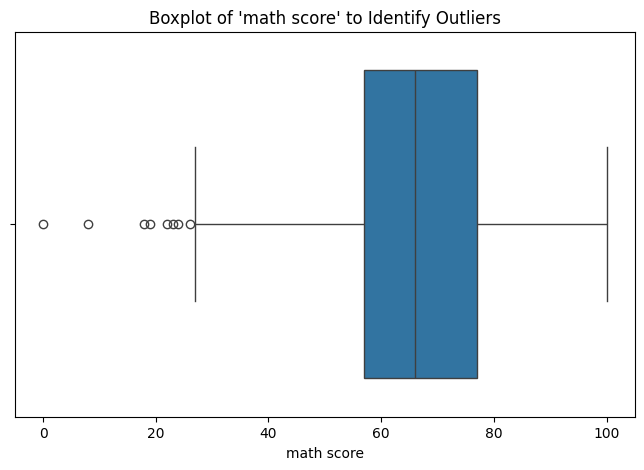

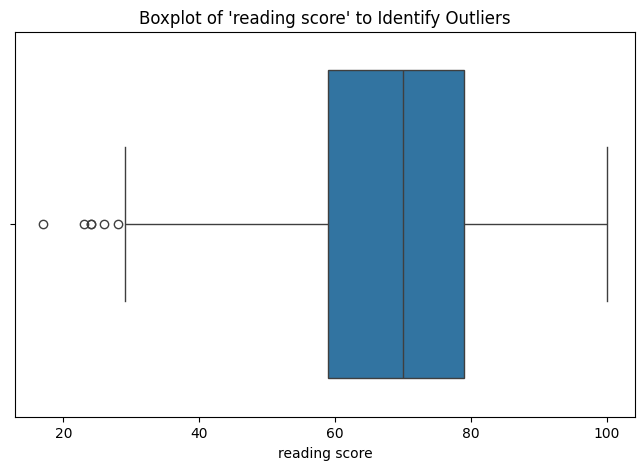

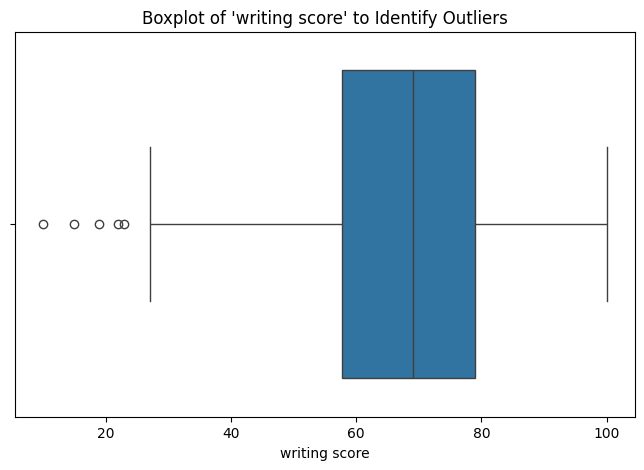

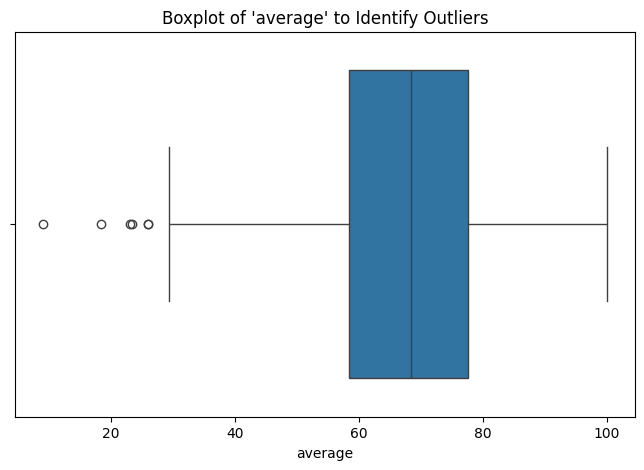

In [62]:
# Outliers
# Plot boxplots for numerical columns to identify outliers
num_cols = ['math score', 'reading score', 'writing score','average' ]
for col in num_cols:
    plt.figure(figsize=(8, 5))  # Set the figure size
    sns.boxplot(x=df[col])  # Create the boxplot
    plt.title(f"Boxplot of '{col}' to Identify Outliers")  # Add a title
    plt.xlabel(col)  # Label the x-axis
    plt.show()

In [63]:
# Calculating the outliers using 1.5xIQR rule
def count_outliers(df, col):
    Q1 = df[col].quantile(0.25)  # First quartile (25%)
    Q3 = df[col].quantile(0.75)  # Third quartile (75%)
    IQR = Q3 - Q1  # Interquartile range
    lower_limit = Q1 - 1.5 * IQR  # Lower bound
    upper_limit = Q3 + 1.5 * IQR  # Upper bound

    # Count outliers
    lower_outliers = (df[col] < lower_limit).sum()
    upper_outliers = (df[col] > upper_limit).sum()

    return lower_outliers, upper_outliers

# Define the columns to analyze - these columns exist in your dataframe, df
outlier_cols = ['math score', 'reading score', 'writing score','average']

# Print outlier counts for each column
for col in outlier_cols:
    lower_outliers, upper_outliers = count_outliers(df, col)
    print(f"Column: {col}")
    print(f"  - Lower outliers: {lower_outliers}")
    print(f"  - Upper outliers: {upper_outliers}")
    print(f"  - Total outliers: {lower_outliers + upper_outliers}\n")

Column: math score
  - Lower outliers: 8
  - Upper outliers: 0
  - Total outliers: 8

Column: reading score
  - Lower outliers: 6
  - Upper outliers: 0
  - Total outliers: 6

Column: writing score
  - Lower outliers: 5
  - Upper outliers: 0
  - Total outliers: 5

Column: average
  - Lower outliers: 6
  - Upper outliers: 0
  - Total outliers: 6



In [64]:
# Select categorical columns from the dataframe
cat_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

# Loop through each categorical column and print unique values
for col in cat_cols:
    print(f"Unique values in '{col}':")
    print(df[col].unique())  # Print the unique values of the column
    print("-" * 50)  # Add a separator for better readability

Unique values in 'gender':
['female' 'male']
--------------------------------------------------
Unique values in 'race/ethnicity':
['group B' 'group C' 'group A' 'group D' 'group E']
--------------------------------------------------
Unique values in 'parental level of education':
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
--------------------------------------------------
Unique values in 'lunch':
['standard' 'free/reduced']
--------------------------------------------------
Unique values in 'test preparation course':
['none' 'completed']
--------------------------------------------------


In [65]:
# Define the mapping for 'parental level of education' based on ordinal nature
education_order = {
    'some high school': 0,
    'high school': 1,
    'associate\'s degree': 2,
    'some college': 3,
    'bachelor\'s degree': 4,
    'master\'s degree': 5
}

# Apply the mapping to the 'parental level of education' column
df['parental level of education'] = df['parental level of education'].map(education_order)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Label encode 'gender' (binary)
df['gender'] = label_encoder.fit_transform(df['gender'])  # Male = 0, Female = 1

# Label encode 'test preparation course' (binary: none/completed)
df['test preparation course'] = label_encoder.fit_transform(df['test preparation course'])  # none = 0, completed = 1

# One-Hot Encoding for 'race/ethnicity' and 'lunch' (nominal categories)
df_encoded = pd.get_dummies(df, columns=['race/ethnicity', 'lunch'], drop_first=True, dtype=int)

# Check the encoded dataframe
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   int64  
 1   parental level of education  1000 non-null   int64  
 2   test preparation course      1000 non-null   int64  
 3   math score                   1000 non-null   int64  
 4   reading score                1000 non-null   int64  
 5   writing score                1000 non-null   int64  
 6   average                      1000 non-null   float64
 7   race/ethnicity_group B       1000 non-null   int64  
 8   race/ethnicity_group C       1000 non-null   int64  
 9   race/ethnicity_group D       1000 non-null   int64  
 10  race/ethnicity_group E       1000 non-null   int64  
 11  lunch_standard               1000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 93.9 KB


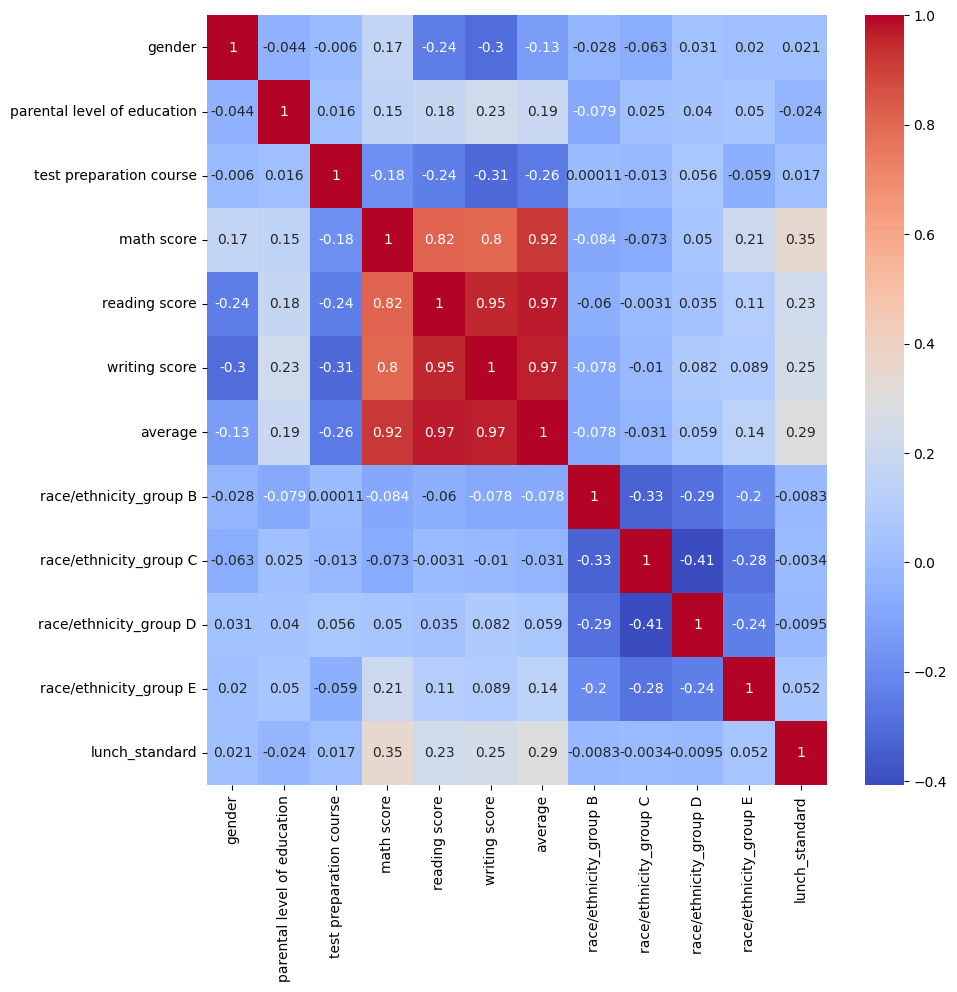

In [66]:
# Correlation Matrix plt
plt.figure(figsize=(10,10))
# Select only numerical features for correlation calculation
numerical_df = df_encoded.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [69]:
# Important features in predicting wine quality
feature_correlation = df_encoded.corr()["average"].sort_values(ascending=False)
print("\nFeature Importance (Correlation with Average):\n", feature_correlation)


Feature Importance (Correlation with Average):
 average                        1.000000
reading score                  0.970331
writing score                  0.965667
math score                     0.918746
lunch_standard                 0.290064
parental level of education    0.194106
race/ethnicity_group E         0.141050
race/ethnicity_group D         0.058902
race/ethnicity_group C        -0.030691
race/ethnicity_group B        -0.078247
gender                        -0.130861
test preparation course       -0.256710
Name: average, dtype: float64




---


**Q5 Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution of each feature**

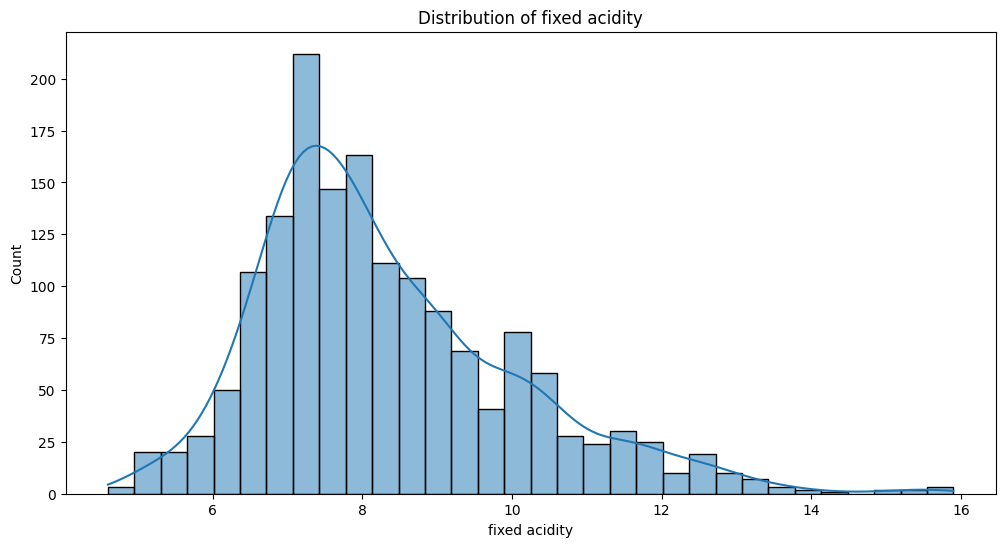

Skewness of fixed acidity: 0.98


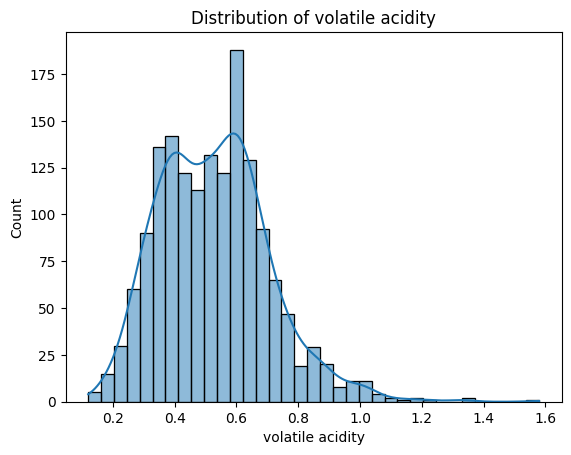

Skewness of volatile acidity: 0.67


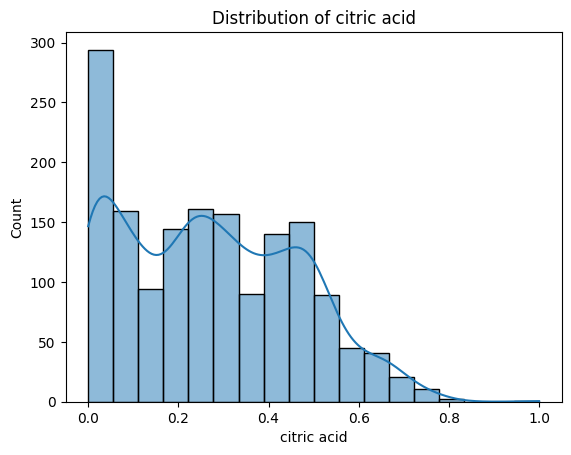

Skewness of citric acid: 0.32


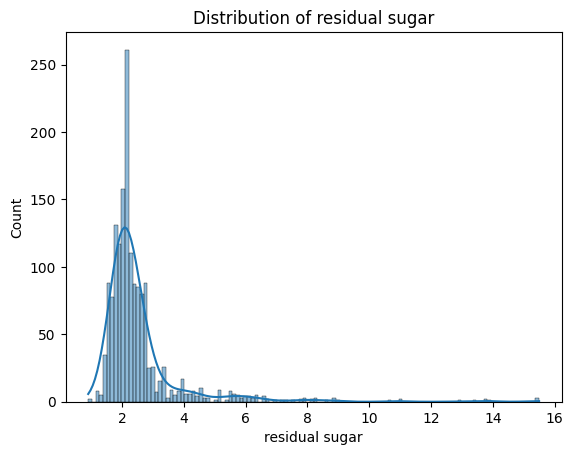

Skewness of residual sugar: 4.54


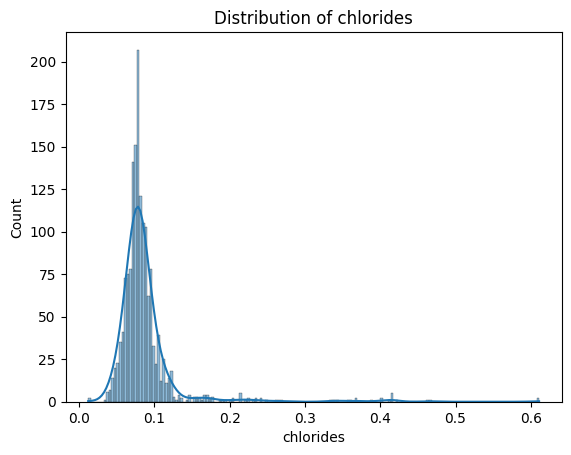

Skewness of chlorides: 5.68


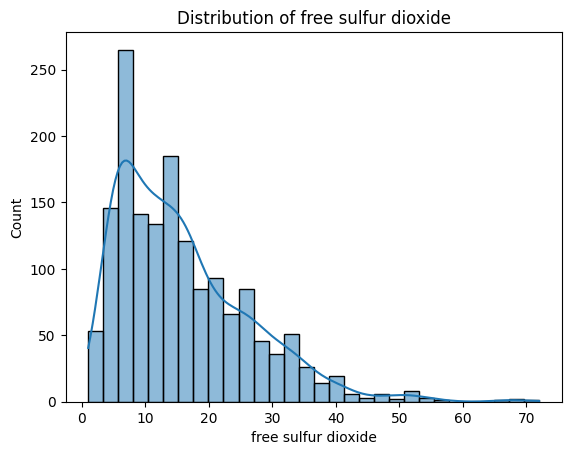

Skewness of free sulfur dioxide: 1.25


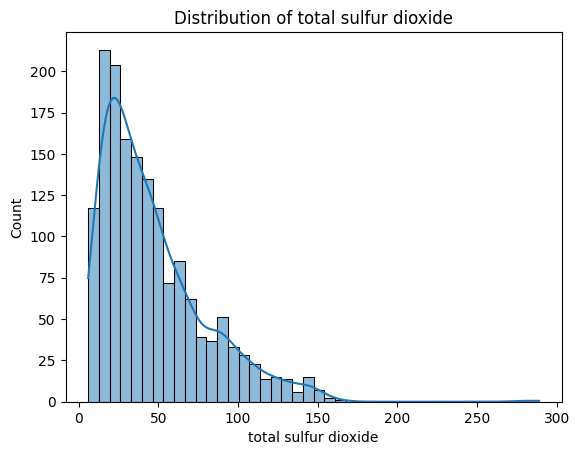

Skewness of total sulfur dioxide: 1.51


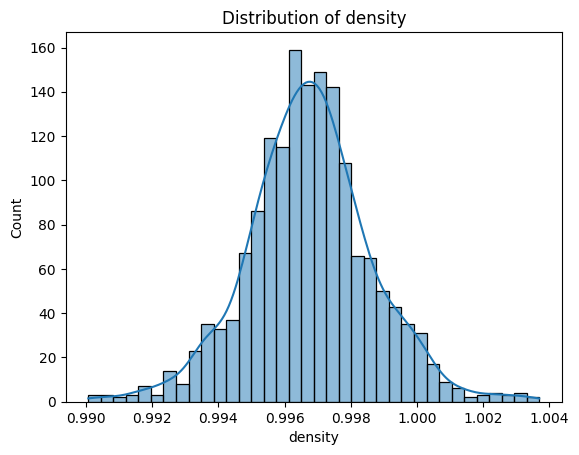

Skewness of density: 0.07


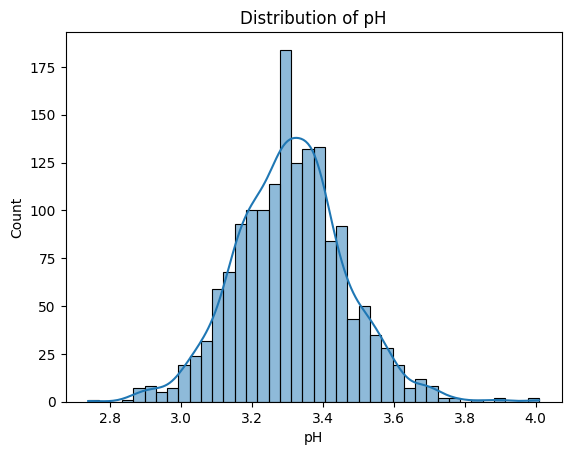

Skewness of pH: 0.19


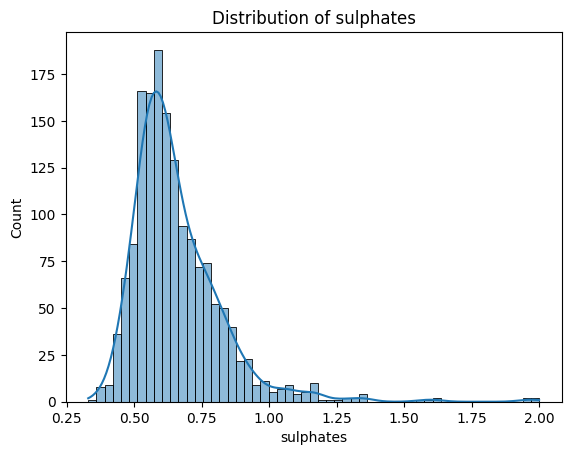

Skewness of sulphates: 2.43


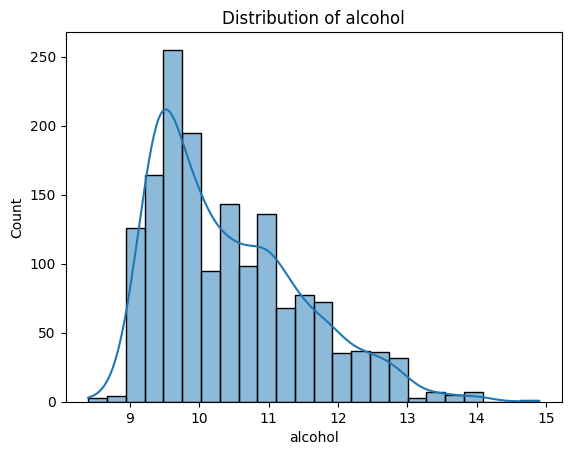

Skewness of alcohol: 0.86


In [72]:
plt.figure(figsize=(12, 6))
for col in wine_df.columns[:-1]:  # Excluding 'quality'
    sns.histplot(wine_df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()
    print(f"Skewness of {col}: {stats.skew(wine_df[col]):.2f}")

**5.1 Which feature(s) exhibit non-normality, and what transformations could be applied to these features to improve normality?**

**Which feature(s) exhibit non-normality**

Values
*   Skewness of fixed acidity: 0.98
*   Skewness of volatile acidity: 0.67
*   Skewness of citric acid: 0.32
*   Skewness of residual sugar: 4.54
*   Skewness of chlorides: 5.68
*   Skewness of free sulfur dioxide: 1.25
*   Skewness of total sulfur dioxide: 1.51
*   Skewness of density: 0.07
*   Skewness of pH: 0.19
*   Skewness of sulphates: 2.43
*   Skewness of alcohol: 0.86

*Highly Skewed Features (Skewness > 2):* Residual sugar, chlorides, and sulphates exhibit strong positive skew and should benefit from a log transformation (or Box-Cox transformation for more flexibility).

*Moderately Skewed Features (Skewness between 1 and 2):* Free sulfur dioxide, total sulfur dioxide, and alcohol could benefit from log transformations or square root transformations.

*Mild Skewness (Skewness < 1):* Fixed acidity, volatile acidity, citric acid, and pH have mild skewness and may not need transformations, but log or square root transformations can be applied if necessary.
